# E-Commerce Shipping

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Reading the data 

In [2]:
df = pd.read_csv(r"E:\Project 1\Train.csv")

In [3]:
df.shape

(10999, 12)

In [4]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df.size

131988

In [6]:
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [7]:
df = df.drop(['ID'], axis =1)

In [8]:
df.rename(columns={'Reached.on.Time_Y.N':'Target_variable'}, inplace = True)

# Insights of the data 

In [9]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target_variable
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [10]:
df.Cost_of_the_Product.describe()

count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64

In [11]:
df.Weight_in_gms.describe()

count    10999.000000
mean      3634.016729
std       1635.377251
min       1001.000000
25%       1839.500000
50%       4149.000000
75%       5050.000000
max       7846.000000
Name: Weight_in_gms, dtype: float64

In [12]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,10989,10990,10991,10992,10993,10994,10995,10996,10997,10998
Warehouse_block,D,F,A,B,C,F,D,F,A,B,...,B,C,F,D,F,A,B,C,F,D
Mode_of_Shipment,Flight,Flight,Flight,Flight,Flight,Flight,Flight,Flight,Flight,Flight,...,Ship,Ship,Ship,Ship,Ship,Ship,Ship,Ship,Ship,Ship
Customer_care_calls,4,4,2,3,2,3,3,4,3,3,...,5,5,5,5,5,4,4,5,5,2
Customer_rating,2,5,2,3,2,1,4,1,4,2,...,1,4,2,1,1,1,1,4,2,5
Cost_of_the_Product,177,216,183,176,184,162,250,233,150,164,...,218,219,261,236,257,252,232,242,223,155
Prior_purchases,3,2,4,4,3,3,3,2,3,3,...,5,6,5,5,6,5,5,5,6,5
Product_importance,low,low,low,medium,medium,medium,low,low,low,medium,...,medium,low,medium,medium,low,medium,medium,low,medium,low
Gender,F,M,M,M,F,F,F,F,F,F,...,F,M,M,M,F,F,F,F,M,F
Discount_offered,44,59,48,10,46,12,3,48,11,29,...,9,3,9,3,1,1,6,4,2,6
Weight_in_gms,1233,3088,3374,1177,2484,1417,2371,2804,1861,1187,...,1603,1098,1227,1906,1150,1538,1247,1155,1210,1639


# Checking for nulls

In [13]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Target_variable        0
dtype: int64

# Information of the Dataset

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Target_variable      10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [15]:
df.Warehouse_block.value_counts()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [16]:
df.Mode_of_Shipment.value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [17]:
df.Product_importance.value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [18]:
df.Gender.value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

# Categorical Variable Analysis

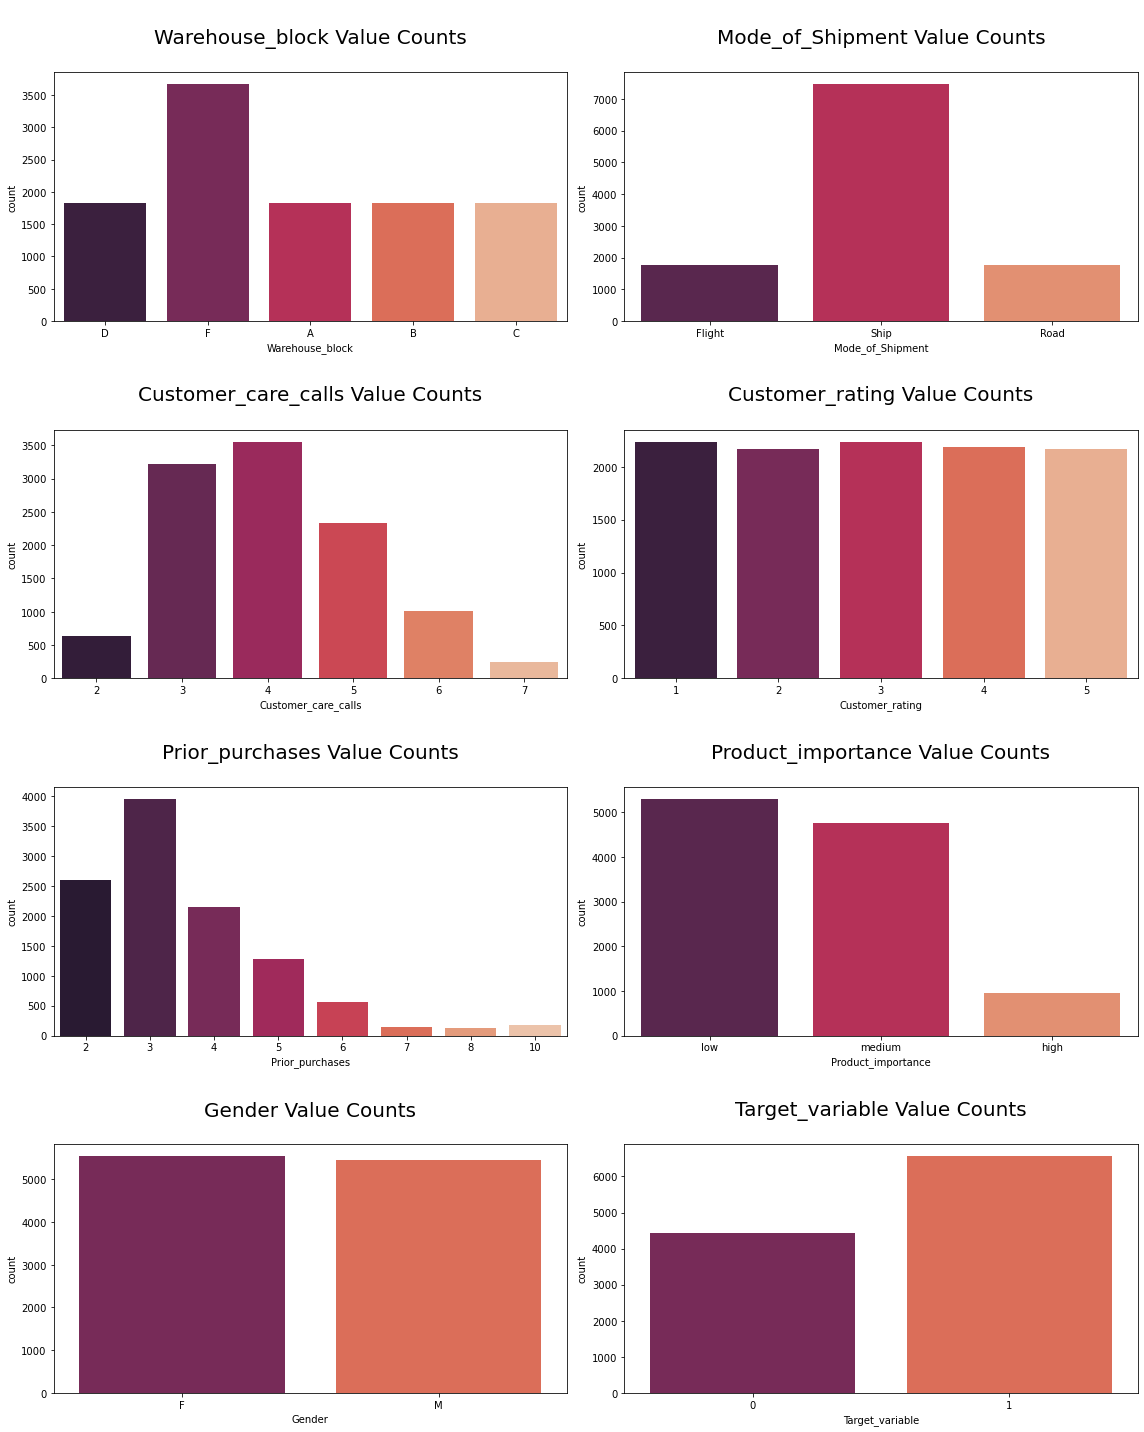

In [19]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Target_variable']

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
#Among all warehouse_blocks F block has delayed as compared to other blocks because the rush of shipping is more.

# Basic Data Analysis

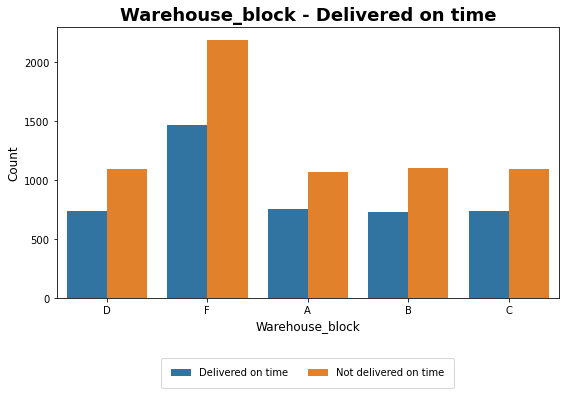

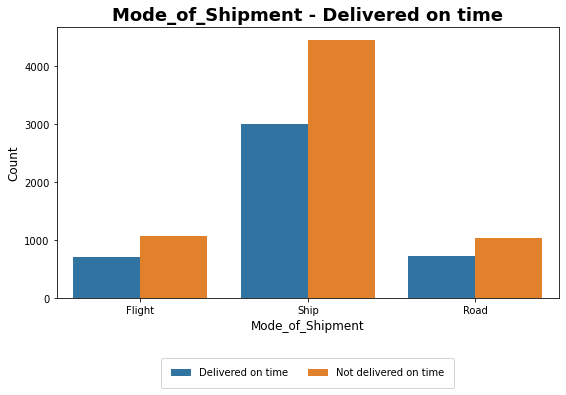

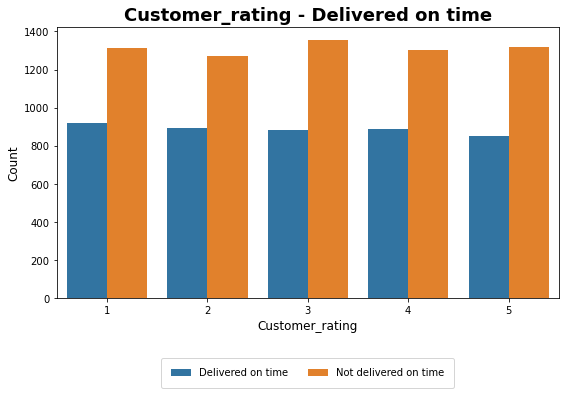

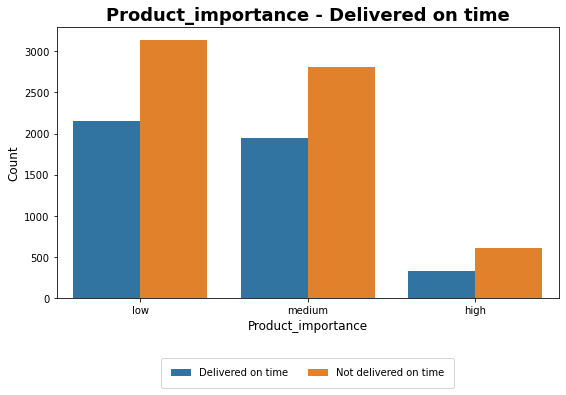

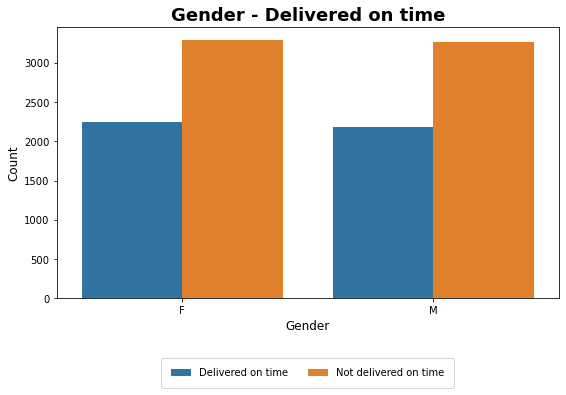

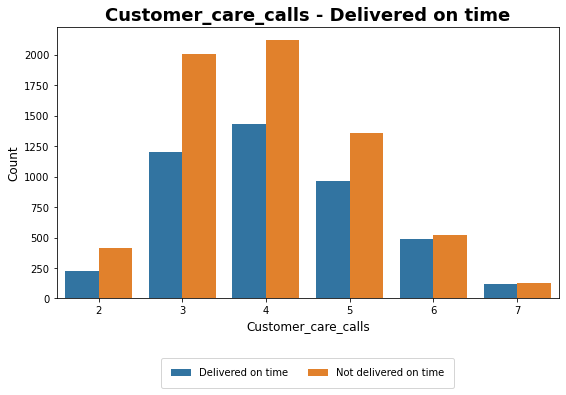

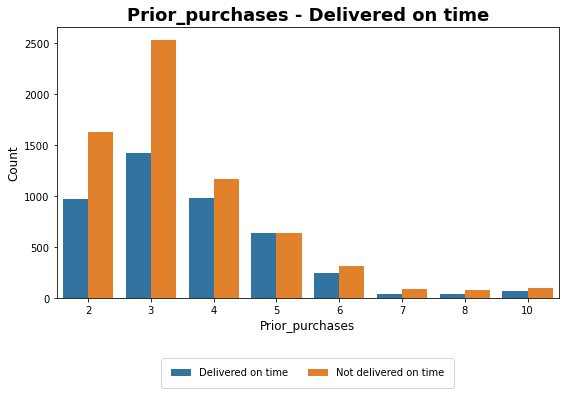

In [20]:
features = ["Warehouse_block","Mode_of_Shipment","Customer_rating","Product_importance","Gender","Customer_care_calls","Prior_purchases"]

for f in features:
    fig, ax = plt.subplots(figsize=(9, 5))
    sns.countplot(x=f,data=df,hue="Target_variable")
    ax.legend(["Delivered on time","Not delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
    plt.ylabel("Count",fontsize=12, fontweight='light')
    plt.xlabel(f"{f}",fontsize=12, fontweight='light')
    plt.title("{} - Delivered on time".format(f), fontsize=18, fontweight='bold')
    plt.show();

# Bi-Variate Analysis

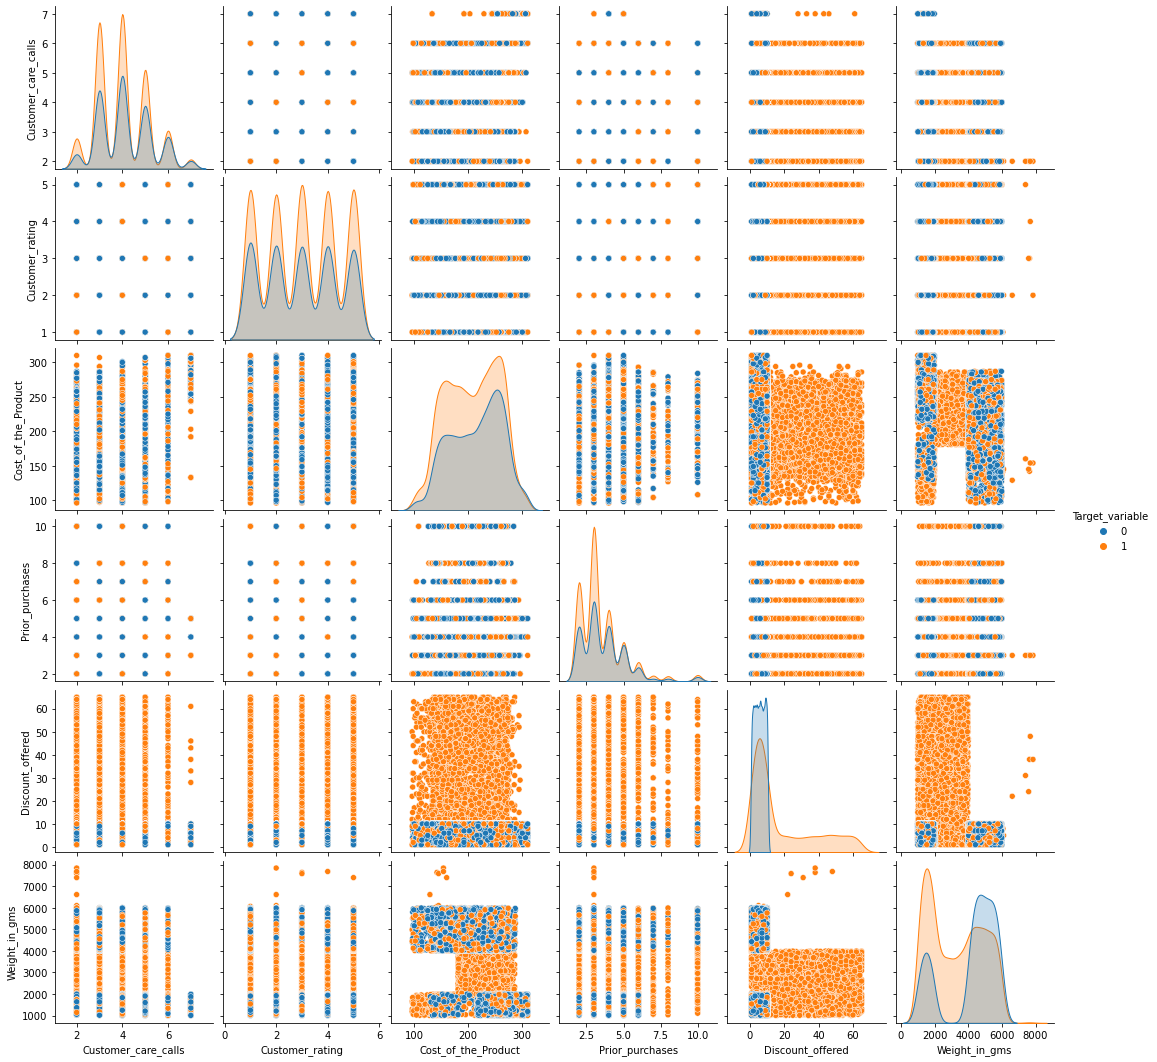

In [21]:
sns.pairplot (df, hue = 'Target_variable');

In [22]:
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Target_variable
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Target_variable,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


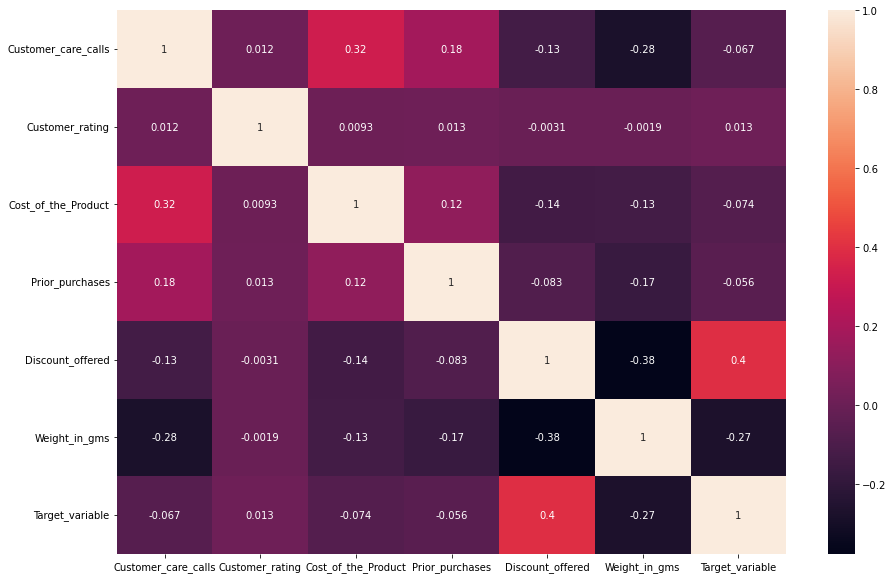

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True);

# Checking for outliers

<AxesSubplot:xlabel='Cost_of_the_Product'>

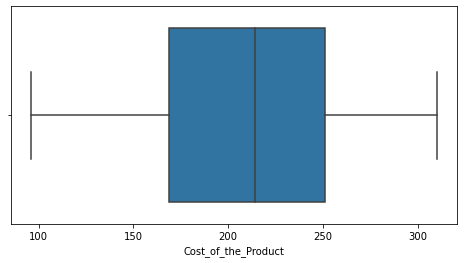

In [24]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Cost_of_the_Product', data=df,orient='h')

<AxesSubplot:xlabel='Discount_offered'>

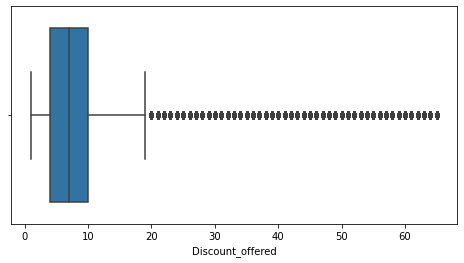

In [25]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Discount_offered', data=df,orient='h')

<AxesSubplot:xlabel='Weight_in_gms'>

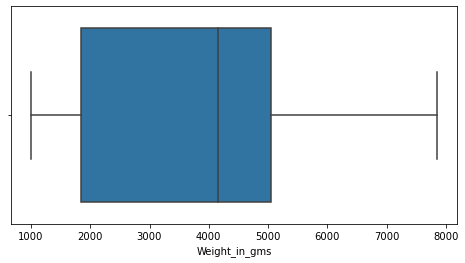

In [26]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Weight_in_gms', data=df,orient='h')

# Handling outliers with IQR

In [27]:
for colname,colvals in df.iteritems():
    if df[colname].dtype!=object and colname!='Target_variable':
        Q1=df[colname].quantile(q=0.25)
        Q3=df[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        df.loc[(df[colname]<low) | (df[colname]>up) ,colname]=df[colname].median()
    else:
        continue

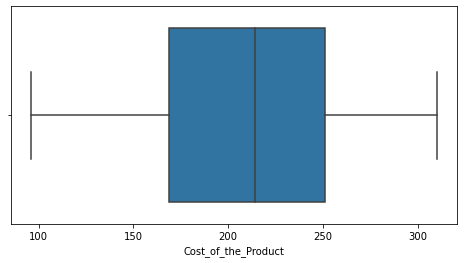

In [28]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Cost_of_the_Product', data=df,orient='h');

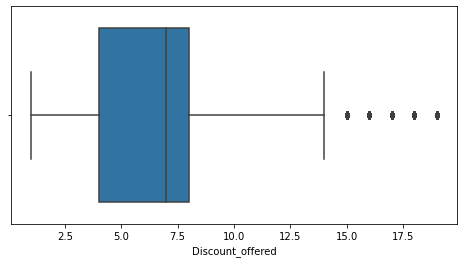

In [29]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Discount_offered', data=df,orient='h');

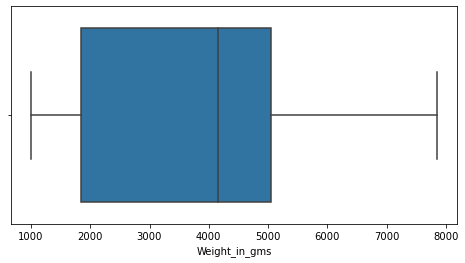

In [30]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'Weight_in_gms', data=df,orient='h');

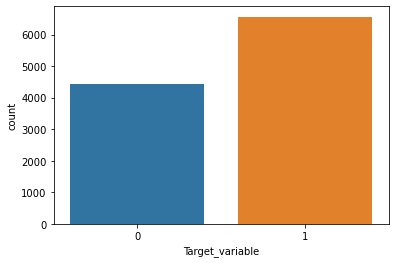

In [31]:
sns.countplot(df['Target_variable']);

# Pre-processing for categorical to numerical 

In [32]:
df.Warehouse_block.replace({'A':0,'B':1,'C':2,'D':3,'F':4}, inplace = True)
df.Mode_of_Shipment.replace({'Ship':0, 'Flight':1, 'Road':2}, inplace = True)
df.Product_importance.replace({'low':0, 'medium':1, 'high':2}, inplace = True)
df.Gender.replace({'F':0, 'M':1}, inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      10999 non-null  int64
 1   Mode_of_Shipment     10999 non-null  int64
 2   Customer_care_calls  10999 non-null  int64
 3   Customer_rating      10999 non-null  int64
 4   Cost_of_the_Product  10999 non-null  int64
 5   Prior_purchases      10999 non-null  int64
 6   Product_importance   10999 non-null  int64
 7   Gender               10999 non-null  int64
 8   Discount_offered     10999 non-null  int64
 9   Weight_in_gms        10999 non-null  int64
 10  Target_variable      10999 non-null  int64
dtypes: int64(11)
memory usage: 945.4 KB


# Random Sampling 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df_train, df_test = train_test_split(df, test_size=.2)

In [36]:
df_train_x = df_train.drop(['Target_variable'], axis=1)
df_train_y = df_train.Target_variable

In [37]:
df_test_x = df_test.drop(['Target_variable'], axis=1)
df_test_y = df_test.Target_variable

# Logistic regression 

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_df = LogisticRegression()

In [40]:
log_df.fit(df_train_x, df_train_y)

LogisticRegression()

In [41]:
pred_log = log_df.predict(df_test_x)
pred_log

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [42]:
from sklearn.metrics import *

In [43]:
tab_df = confusion_matrix(df_test_y, pred_log)
tab_df

array([[ 378,  501],
       [ 280, 1041]], dtype=int64)

In [44]:
accuracy_score(df_test_y, pred_log)

0.645

In [45]:
recall_score(df_test_y , pred_log) 

0.7880393641180924

In [46]:
fpr = 502 / (502+375)
fpr

0.572405929304447

In [47]:
precision_score(df_test_y, pred_log)

0.6750972762645915

In [48]:
f1_score(df_test_y, pred_log)

0.7272092210967518

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [50]:
pred_prob = log_df.predict_proba(df_test_x)
pred_prob  ## It is giving prob in zero and 1 for each record 

array([[0.49883991, 0.50116009],
       [0.55970848, 0.44029152],
       [0.34561382, 0.65438618],
       ...,
       [0.39813275, 0.60186725],
       [0.53997216, 0.46002784],
       [0.30732387, 0.69267613]])

In [51]:
roc_auc_score(df_test_y, pred_log)

0.6090367469054626

In [52]:
pred_prob[: , 1]  

array([0.50116009, 0.44029152, 0.65438618, ..., 0.60186725, 0.46002784,
       0.69267613])

In [53]:
fpr, tpr, thres = roc_curve(df_test_y, pred_prob[: , 1])

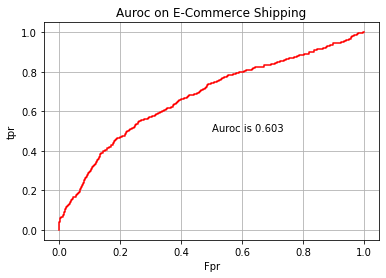

In [54]:
plt.plot(fpr, tpr, color = 'r')
plt.xlabel('Fpr')
plt.ylabel('tpr')
plt.title("Auroc on E-Commerce Shipping")
plt.grid()
plt.text(x = .5, y = .5 , s = "Auroc is 0.603");

# Decision tree with Entropy 

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt_df = DecisionTreeClassifier(criterion='entropy')

In [57]:
dt_df.fit(df_train_x, df_train_y)

DecisionTreeClassifier(criterion='entropy')

In [58]:
pred_dt = dt_df.predict(df_test_x)
pred_dt

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [59]:
from sklearn.metrics import *

In [60]:
tab_dt = confusion_matrix(df_test_y, pred_dt)
tab_dt

array([[477, 402],
       [374, 947]], dtype=int64)

In [61]:
dt_df.feature_importances_ 

array([0.06142942, 0.0306232 , 0.04595365, 0.05591757, 0.1878962 ,
       0.10014068, 0.02614168, 0.02257341, 0.11410413, 0.35522006])

In [62]:
feature_imp = pd.DataFrame({'Features': df_train_x.columns, 
                            'Importance':dt_df.feature_importances_})
feature_imp.sort_values('Importance', ascending = False)

,Features,Importance
9,Weight_in_gms,0.355220
4,Cost_of_the_Product,0.187896
8,Discount_offered,0.114104
5,Prior_purchases,0.100141
0,Warehouse_block,0.061429
3,Customer_rating,0.055918
2,Customer_care_calls,0.045954
1,Mode_of_Shipment,0.030623
6,Product_importance,0.026142
7,Gender,0.022573


In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(df_test_y, pred_dt)

0.6472727272727272

In [65]:
recall_score(df_test_y , pred_dt) 

0.7168811506434519

In [66]:
fpr = 356 /(356+521)
fpr

0.40592930444697833

In [67]:
precision_score(df_test_y, pred_dt)

0.7020014825796886

In [68]:
f1_score(df_test_y, pred_dt)

0.7093632958801498

In [69]:
roc_auc_score(df_test_y, pred_dt)

0.6297716333422038

In [70]:
pred_prob = dt_df.predict_proba(df_test_x)

In [71]:
fpr, tpr, thres = roc_curve(df_test_y, pred_prob[:,1])

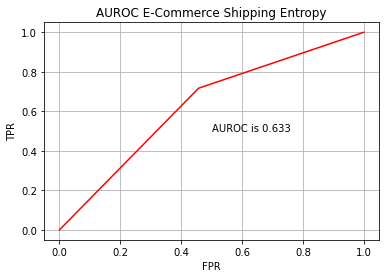

In [72]:
plt.plot(fpr,tpr, color= "r")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC E-Commerce Shipping Entropy")
plt.grid()
plt.text(x = .5, y = .5, s = "AUROC is 0.633 ");


# Decision tree with Gini 

In [73]:
dtg_df = DecisionTreeClassifier()

In [74]:
dtg_df.fit(df_train_x, df_train_y)

DecisionTreeClassifier()

In [75]:
pred_dtg = dtg_df.predict(df_test_x)
pred_dtg

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [76]:
tab_dtg = confusion_matrix(df_test_y, pred_dtg)
tab_dtg

array([[482, 397],
       [382, 939]], dtype=int64)

In [77]:
dtg_df.feature_importances_ 

array([0.06272615, 0.03810476, 0.04959036, 0.05061546, 0.17796989,
       0.09149093, 0.03061161, 0.01550455, 0.09776871, 0.38561758])

In [78]:
feature_imp = pd.DataFrame({'Features': df_train_x.columns, 
                            'Importance':dtg_df.feature_importances_})
feature_imp.sort_values('Importance', ascending = False)

,Features,Importance
9,Weight_in_gms,0.385618
4,Cost_of_the_Product,0.177970
8,Discount_offered,0.097769
5,Prior_purchases,0.091491
0,Warehouse_block,0.062726
3,Customer_rating,0.050615
2,Customer_care_calls,0.049590
1,Mode_of_Shipment,0.038105
6,Product_importance,0.030612
7,Gender,0.015505


In [79]:
accuracy_score(df_test_y, pred_dtg)

0.6459090909090909

In [80]:
fpr =  387/(387+490)   
fpr 

0.4412770809578107

In [81]:
recall_score(df_test_y, pred_dtg)

0.7108251324753975

In [82]:
precision_score(df_test_y, pred_dtg)

0.7028443113772455

In [83]:
f1_score(df_test_y, pred_dtg)

0.7068121942039894

In [84]:
roc_auc_score(df_test_y, pred_dtg)

0.6295877653275737

In [85]:
pred_prob = dtg_df.predict_proba(df_test_x)

In [86]:
fpr, tpr, thres = roc_curve(df_test_y, pred_prob[:,1])

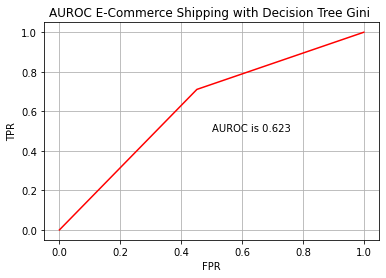

In [87]:
plt.plot(fpr,tpr, color= "r")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC E-Commerce Shipping with Decision Tree Gini ")
plt.grid()
plt.text(x = .5, y = .5, s = "AUROC is 0.623 ");


# Random Forest 

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc_df = RandomForestClassifier(criterion='entropy', max_depth=100)

In [90]:
rfc_df.fit(df_train_x, df_train_y)

RandomForestClassifier(criterion='entropy', max_depth=100)

In [91]:
pred_rfc = rfc_df.predict(df_test_x)

In [92]:
tab_rfc = confusion_matrix(df_test_y, pred_rfc)
tab_rfc

array([[600, 279],
       [448, 873]], dtype=int64)

In [93]:
accuracy_score(df_test_y, pred_rfc)

0.6695454545454546

In [94]:
fpr = 257/(257+620)
fpr

0.29304446978335236

In [95]:
recall_score(df_test_y, pred_rfc)

0.6608629825889477

In [96]:
precision_score(df_test_y, pred_rfc)

0.7578125

In [97]:
f1_score(df_test_y, pred_rfc)

0.7060250707642539

In [98]:
roc_auc_score(df_test_y, pred_rfc)

0.6717284196221189

In [99]:
feature_importance_df = pd.DataFrame({'Featured': df_train_x.columns, 
                                      'Importance':rfc_df.feature_importances_})
feature_importance_df.sort_values('Importance', ascending = False)

,Featured,Importance
9,Weight_in_gms,0.348815
4,Cost_of_the_Product,0.197215
8,Discount_offered,0.122294
0,Warehouse_block,0.061900
2,Customer_care_calls,0.061727
3,Customer_rating,0.061158
5,Prior_purchases,0.051383
1,Mode_of_Shipment,0.035974
6,Product_importance,0.033576
7,Gender,0.025958


# Ada-Boosting for DT & Logistic regression 

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
abc = AdaBoostClassifier( log_df , n_estimators = 15)

In [102]:
abc.fit(df_train_x, df_train_y)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=15)

In [103]:
pred_abc = abc.predict(df_test_x)

In [104]:
tab_abc = confusion_matrix(df_test_y, pred_abc)
tab_abc


array([[ 344,  535],
       [ 283, 1038]], dtype=int64)

In [105]:
accuracy_score(df_test_y, pred_abc)

0.6281818181818182

In [106]:
recall_score(df_test_y, pred_abc)

0.7857683573050719

In [107]:
fpr = 514 / (514+374)
fpr

0.5788288288288288

In [108]:
precision_score(df_test_y, pred_abc)

0.6598855689764781

In [109]:
f1_score(df_test_y, pred_abc)

0.7173462335867312

In [110]:
roc_auc_score(df_test_y, pred_abc)

0.5885610842270524

In [111]:
abc_dtg = AdaBoostClassifier( dtg_df , n_estimators = 15)

In [112]:
abc_dtg.fit(df_train_x, df_train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15)

In [113]:
pred_abc_dtg = abc.predict(df_test_x)

In [114]:
tab_abc = confusion_matrix(df_test_y, pred_abc_dtg)
tab_abc


array([[ 344,  535],
       [ 283, 1038]], dtype=int64)

In [115]:
accuracy_score(df_test_y, pred_abc_dtg)

0.6281818181818182

In [116]:
recall_score(df_test_y, pred_abc_dtg)

0.7857683573050719

In [117]:
fpr = 389/(389+499)
fpr

0.4380630630630631

In [118]:
f1_score(df_test_y, pred_abc_dtg)

0.7173462335867312

In [119]:
precision_score(df_test_y, pred_abc_dtg)

0.6598855689764781

In [120]:
roc_auc_score(df_test_y, pred_abc_dtg)

0.5885610842270524

# K-Nearest Neighbour(KNN)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn_df = KNeighborsClassifier(n_neighbors=5)

In [123]:
knn_df.fit(df_train_x,df_train_y)

KNeighborsClassifier()

In [124]:
pred_knn = knn_df.predict(df_test_x)

In [125]:
tab_knn = confusion_matrix(df_test_y, pred_knn)
tab_knn


array([[532, 347],
       [401, 920]], dtype=int64)

In [126]:
accuracy_score(df_test_y, pred_knn)

0.66

In [127]:
fpr = 343/(343+534)
fpr

0.39110604332953247

In [128]:
recall_score(df_test_y, pred_knn)

0.6964420893262679

In [129]:
precision_score(df_test_y, pred_knn)

0.7261247040252565

In [130]:
f1_score(df_test_y, pred_knn)

0.7109737248840803

In [131]:
roc_auc_score(df_test_y, pred_knn)

0.6508376544469793

In [132]:
acc=[]
for k in range(1,51):
    knn_df = KNeighborsClassifier(n_neighbors=k)
    knn_df.fit(df_train_x, df_train_y)
    pred_knn = knn_df.predict(df_test_x)
    tab_knn = confusion_matrix(df_test_y, pred_knn)
    acc.append(accuracy_score(df_test_y, pred_knn)*100)

In [133]:
k_value =list(range(1,51))

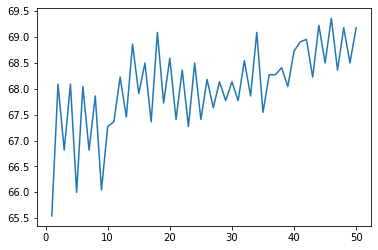

In [134]:
plt.plot(k_value  , acc )

In [135]:
scores = [[0.623, 0.753, 0.572, 0.665, 0.706, 0.590], [0.652, 0.690, 0.405, 0.719, 0.704, 0.590], [0.648, 0.708, 0.441, 0.7077,0.7079, 0.633],
          [0.656,0.623,0.293,0.762,0.686,0.665],
           [0.642, 0.699, 0.443, 0.704, 0.702,0.628],[0.65, 0.62, 0.391, 0.723, 0.699, 0.643]]

In [136]:
df1 = pd.DataFrame(scores, columns = ['Accuracy_Score', 'Recall_score', 'Fpr', 'Precision_score', 'f1_score', 'roc_score'])
df1

,Accuracy_Score,Recall_score,Fpr,Precision_score,f1_score,roc_score
0,0.623,0.753,0.572,0.6650,0.7060,0.590
1,0.652,0.690,0.405,0.7190,0.7040,0.590
2,0.648,0.708,0.441,0.7077,0.7079,0.633
3,0.656,0.623,0.293,0.7620,0.6860,0.665
4,0.642,0.699,0.443,0.7040,0.7020,0.628
5,0.650,0.620,0.391,0.7230,0.6990,0.643


In [137]:
Algorithms = ['Logistic Regression', 'Decision Tree Entropy', 'Decision Tree', 'Random Forest', 'Adaboosting_dt', 'KNN']

In [138]:
df1['Algorithms'] = Algorithms

In [139]:
cols = list(df1.columns)
cols = [cols[-1]] + cols[:-1]
df1 = df1[cols]

In [140]:
df1.sort_values('Fpr', ascending = True)

,Algorithms,Accuracy_Score,Recall_score,Fpr,Precision_score,f1_score,roc_score
3,Random Forest,0.656,0.623,0.293,0.7620,0.6860,0.665
5,KNN,0.650,0.620,0.391,0.7230,0.6990,0.643
1,Decision Tree Entropy,0.652,0.690,0.405,0.7190,0.7040,0.590
2,Decision Tree,0.648,0.708,0.441,0.7077,0.7079,0.633
4,Adaboosting_dt,0.642,0.699,0.443,0.7040,0.7020,0.628
0,Logistic Regression,0.623,0.753,0.572,0.6650,0.7060,0.590


# Hyper Parameter Tuning with Decision Tree

In [141]:
dt = DecisionTreeClassifier()

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
search_dict = {'criterion':['gini', 'entropy'],
              'max_depth' : (5,6,7,8),
              'min_samples_split':(50, 75, 100, 150)}

In [144]:
grid = GridSearchCV( dt, param_grid = search_dict)
grid.fit(df_train_x, df_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (5, 6, 7, 8),
                         'min_samples_split': (50, 75, 100, 150)})

In [145]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 75}

In [146]:
pred = grid.predict(df_test_x)

In [147]:
tab_gs = confusion_matrix(df_test_y, pred)
tab_gs

array([[838,  41],
       [632, 689]], dtype=int64)

In [148]:
accuracy_score(df_test_y, pred)

0.6940909090909091

In [149]:
recall_score(df_test_y, pred)

0.5215745647236941

In [150]:
fpr = 56 / (56+821)
fpr

0.06385404789053592

In [151]:
precision_score(df_test_y, pred)

0.9438356164383561

In [152]:
f1_score(df_test_y, pred)

0.6718673817649927

In [153]:
roc_auc_score(df_test_y, pred)

0.7374653255927913

In [154]:
## After the hyper parameter tuning the best params were {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 150}
# But it horribly failed for class 1 while showing good results for class 0 and for precision and precision is important whenever we are targetting customers 

# Tuning with Random Forest 

In [155]:
rf = RandomForestClassifier()

In [156]:
search_dict = {'criterion':['gini', 'entropy'],
              'max_depth' : (5,6,7,8),
              'min_samples_split':(50, 75, 100, 150)}

In [157]:
grid = GridSearchCV( rf, param_grid = search_dict)
grid.fit(df_train_x, df_train_y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': (5, 6, 7, 8),
                         'min_samples_split': (50, 75, 100, 150)})

In [158]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 100}

In [159]:
pred_rfgs = grid.predict(df_test_x)

In [160]:
tab_rf = confusion_matrix(df_test_y,pred_rfgs)
tab_rf

array([[755, 124],
       [552, 769]], dtype=int64)

In [161]:
accuracy_score(df_test_y, pred_rfgs)

0.6927272727272727

In [162]:
recall_score(df_test_y, pred_rfgs)

0.5821347464042392

In [163]:
fpr = 119 / (119+758)
fpr

0.13568985176738882

In [164]:
precision_score(df_test_y, pred_rfgs)

0.8611422172452408

In [165]:
f1_score(df_test_y, pred_rfgs)

0.6946702800361336

In [166]:
roc_auc_score(df_test_y, pred_rfgs)

0.720532674681073

In [167]:
scores = [[0.623, 0.753, 0.572, 0.665, 0.706, 0.590], [0.652, 0.690, 0.405, 0.719, 0.704, 0.590], [0.648, 0.708, 0.441, 0.7077,0.7079, 0.633],
          [0.656,0.623,0.293,0.762,0.686,0.665],
          [0.642, 0.699, 0.443, 0.704, 0.702,0.628],[0.65, 0.62, 0.391, 0.723, 0.699, 0.643],
          [0.673, 0.528, 0.063, 0.873, 0.658, 0.707], [0.676, 0.562, 0.135, 0.842, 0.674, 0.703]]

In [168]:
df1 = pd.DataFrame(scores, columns = ['Accuracy_Score', 'Recall_score', 'Fpr', 'Precision_score', 'f1_score', 'roc_score'])
df1
Algorithms = ['Logistic Regression', 'Decision Tree Entropy', 'Decision Tree', 'Random Forest', 'Adaboosting_dt', 'KNN',
              'Tuned Decision Tree', 'Tuned Random Forest']
df1['Algorithms'] = Algorithms
cols = list(df1.columns)
cols = [cols[-1]] + cols[:-1]
df1 = df1[cols]
df1.sort_values('Fpr', ascending = True)

,Algorithms,Accuracy_Score,Recall_score,Fpr,Precision_score,f1_score,roc_score
6,Tuned Decision Tree,0.673,0.528,0.063,0.8730,0.6580,0.707
7,Tuned Random Forest,0.676,0.562,0.135,0.8420,0.6740,0.703
3,Random Forest,0.656,0.623,0.293,0.7620,0.6860,0.665
5,KNN,0.650,0.620,0.391,0.7230,0.6990,0.643
1,Decision Tree Entropy,0.652,0.690,0.405,0.7190,0.7040,0.590
2,Decision Tree,0.648,0.708,0.441,0.7077,0.7079,0.633
4,Adaboosting_dt,0.642,0.699,0.443,0.7040,0.7020,0.628
0,Logistic Regression,0.623,0.753,0.572,0.6650,0.7060,0.590
